<h3><i>Predicting the percentage of a student based on the number of hours of study</i></h3>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

<h2>Importing the data</h2>

In [6]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [50]:
print("Data imported successfully!")
df.head()

Data imported successfully!


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h2>Summary of the the data</h2>

In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h2>Exploring the data</h2>

array([[<AxesSubplot:title={'center':'Hours'}>,
        <AxesSubplot:title={'center':'Scores'}>]], dtype=object)

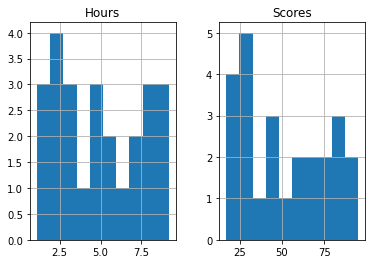

In [9]:
df.hist()

<h2>Plotting the data</h2>

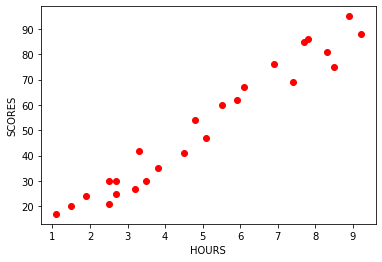

In [11]:
plt.scatter(df.Hours, df.Scores, color="red")
plt.xlabel("HOURS")
plt.ylabel("SCORES")
plt.show()

<h2>Creating train and test sets</h2>

In [12]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

<h2>Plotting the train set</h2>

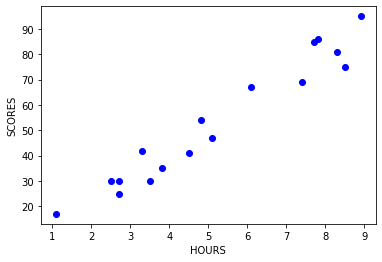

In [14]:
plt.scatter(train.Hours, train.Scores, color="blue")
plt.xlabel("HOURS")
plt.ylabel("SCORES")
plt.show()

<h2>Modeling the data</h2>

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[9.73227501]]
Intercept:  [2.69101217]


<h2>Creating the Line of best fit</h2>

Text(0, 0.5, 'SCORES')

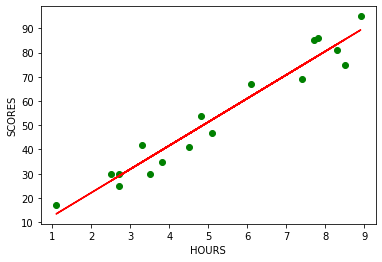

In [53]:
plt.scatter(train.Hours, train.Scores,  color='green')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("HOURS")
plt.ylabel("SCORES")

<h2>Evaluation</h2>

In [31]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
y_pred = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

Mean absolute error: 4.30
Residual sum of squares (MSE): 21.49
R2-score: 0.97


In [19]:
print(test_x)

[[2.5]
 [3.2]
 [1.5]
 [9.2]
 [5.5]
 [5.9]
 [1.9]
 [6.9]]


<h2>Getting the Actual and Predicted scores</h2>

In [58]:
ls1 = list(test_x)
ls2 = list(test_y)
ls3 = list(y_pred)

ml = pd.DataFrame({'Hours':ls1, 'Actual Score': ls2, 'Predicted Score': ls3})  
ml

,Hours,Actual Score,Predicted Score
0,[2.5],[21],[27.021699689663407]
1,[3.2],[27],[33.834292193841016]
2,[1.5],[20],[17.2894246836954]
3,[9.2],[88],[92.22794222964907]
4,[5.5],[60],[56.21852470756744]
5,[5.9],[62],[60.11143470995464]
6,[1.9],[24],[21.1823346860826]
7,[6.9],[76],[69.84370971592264]


<h2>Getting the predicted score for a particular data</h2>

In [61]:
hours = [[9.25]]
own_pred = regr.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(float(own_pred)))

No of Hours = [[9.25]]
Predicted Score = 92.71455597994748
